# Openlab - Validação de Agrupamentos e Segmentação de Imagens | 08-05-2024

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import cv2 
import re
import numpy as np

In [91]:
img = cv2.imread("./Selecao.jpeg")
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [92]:
pixel_vals = img.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

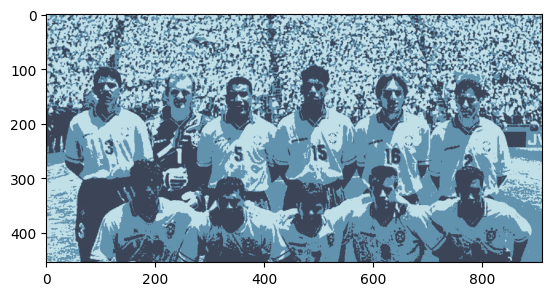

In [93]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.90)
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria ,10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((img.shape))
plt.imshow(segmented_image)

In [94]:
df = pd.read_csv("KMeans_Salario.csv",delimiter=';')
df = df.drop(columns=["Nome"])

def salario_para_numero(salario_texto):
    return float(re.sub(r'[^\d.]', '', salario_texto))

df['Salário Mensal'] = df['Salário Mensal'].apply(salario_para_numero)

df.head(20)

,Idade,Salário Mensal
0,82,44.856
1,53,45.056
2,37,64.674
3,68,27.950
4,39,23.441
5,31,46.985
6,81,20.666
7,52,7.349
8,44,78.542
9,61,14.656


In [95]:
y = df['Salário Mensal']
y.head(20)


0     44.856
1     45.056
2     64.674
3     27.950
4     23.441
5     46.985
6     20.666
7      7.349
8     78.542
9     14.656
10    36.913
11    69.925
12    19.415
13    74.181
14    10.531
15    29.526
16    88.296
17    72.420
Name: Salário Mensal, dtype: float64

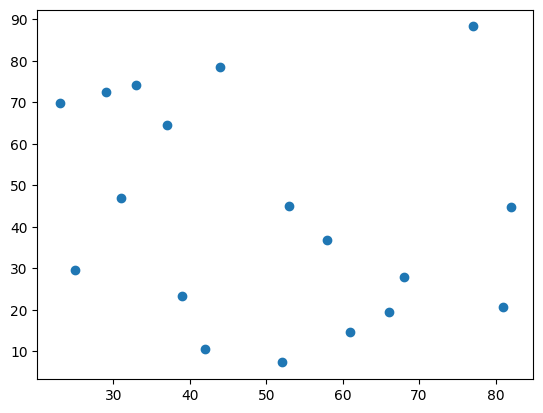

In [97]:
fig, ax = plt.subplots()
ax.scatter(df['Idade'], y)
plt.show()

In [98]:
valores_k = []
ARI = []

for i in range(1,4):
    kmeans = KMeans(n_clusters=i,n_init='auto', random_state=42).fit(df['Idade'])
    valores_k.append(i)
    ARI.append(metrics.adjusted_rand_score(y,kmeans.labels_))
    print(kmeans.inertia_)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

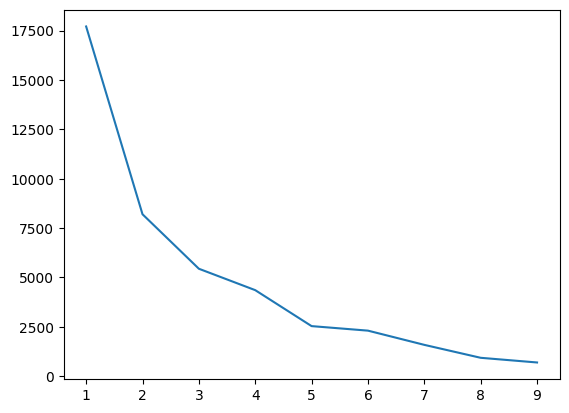

In [ ]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercia)

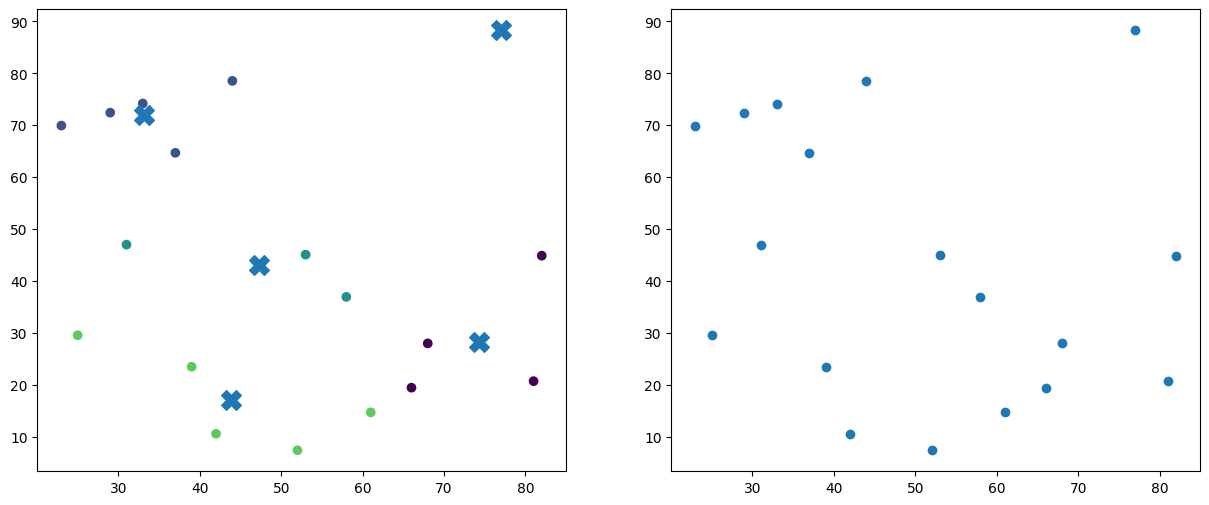

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42).fit(df)
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
ax[0].scatter(df['Idade'], df['Salário Mensal'], c=kmeans.labels_)
ax[0].scatter(centroids[:,0], centroids[:,1], marker="X", s=200)
ax[1].scatter(df['Idade'], df["Salário Mensal"])